In [22]:
import os
set_dict = {'0': 'eUniRep-Augmenting_random_1-2', '1': 'eUniRep_random_1-2', '2': 'UniRep_random_1-2', '3': 'onehot_random_1-2', '4': 'eUniRep-inference'}#'0': 'PtsRep', '1':'Tape', '2':'Unirep', '3':'KNR', '4':'Onehot', '5':'PtsRep_SVR','6':'Tape_SVR'
set_list = [[], [], [], [], []]#[],[],[],[],[],[]\
top_model_name = "lin"
task_name = 'SK_split_test_2'#'SK_split_test_3
train_seq_num = '1000'
split = False
if split:
    input_path = f'/share/jake/github/low_n_output/recall/{top_model_name}/gfp_{task_name}_split_{train_seq_num}'
else:
    input_path = f'/share/jake/github/low_n_output/recall/{top_model_name}/gfp_{task_name}_{train_seq_num}'

In [23]:
def metrics(dic_real, dic_pred):
    tp = tn = fp = fn = 0
    for key in dic_real:
        if dic_real[key] >= 3 and dic_pred[key] >= 3:
            tp += 1
        elif dic_real[key] >= 3 and dic_pred[key] < 3:
            fn += 1
        elif dic_real[key] <= 3 and dic_pred[key] <= 3:
            tn += 1
        elif dic_real[key] < 3 and dic_pred[key] > 3:
            fp += 1
#     print(tp, tn, fp, fn)
#     正类召回 正类准确 负类召回 负类准确
#     print(tp / (tp+fn), tp/(tp+fp), tn/(tn+fp), tn/(tn+fn))

    #ACC
    return (tp + tn) / (tp + fn + tn + fp)
    

import numpy as np
#从set_dict中选择
for _ in range(len(set_list)):
    ds = set_dict[str(_)]
    
    
    n = 256
    tmp_total = [0.0] * n
    flie_list = os.listdir(f'{input_path}/{ds}')
    #5-fold cross validation
    for file_name in flie_list:
        # print(file_name)
        #numpy = np.load(r'C:\Users\dell\Desktop\PtsRep相关数据及文件\numpy回归\numpy_gfp\汇总17_400_4263_double_5mut\400\\' + ds + '\gfp_triple_' + str(fold) + '.npy', allow_pickle=True)
        numpy = np.load(f'{input_path}/{ds}/{file_name}',allow_pickle=True)
        files = numpy[1]#25517
        value = numpy[0]#51304
        dic_real = {}
        dic_pred = {}
        tmp = []
        #
        for i in range(len(files)):
            dic_pred[files[i]] = value[i]
            dic_real[files[i]] = value[i + len(files)]#？？？？
        real_sort = sorted(dic_real.items(), key=lambda x:x[1], reverse = True)#按照value排序
        pred_sort = sorted(dic_pred.items(), key=lambda x:x[1], reverse = True) #降序
        acc = metrics(dic_real, dic_pred)
#         print('Accuracy '+ str(fold) + ':', acc)

        #Recall statistics
        #选前256个进行计算
        for real in real_sort[:n]:
            real = real[0]
            count = 1
            for v in pred_sort:
                if v[0] == real:
                    tmp.append(count)
                    break
                count += 1
        for i in range(n):
            tmp_total[i] += tmp[i] 

    for i in range(len(tmp_total)):
        set_list[_].append(tmp_total[i]/5)

    print(set_list[_])

# SVR_data = np.load('')
# set_list[_].append()

[98.8, 138.2, 103.2, 24.8, 48.4, 123.4, 24.6, 75.0, 58.2, 42.0, 67.4, 98.2, 60.8, 54.0, 77.2, 27.0, 46.2, 109.0, 159.0, 58.0, 107.4, 93.8, 45.2, 85.6, 37.0, 91.6, 48.6, 33.6, 47.0, 80.4, 64.0, 80.0, 63.6, 99.6, 102.2, 27.6, 74.4, 23.8, 66.6, 42.2, 71.2, 49.8, 104.0, 139.6, 77.4, 37.2, 124.4, 71.0, 37.8, 32.2, 76.0, 45.2, 55.4, 169.0, 73.6, 76.0, 102.0, 42.4, 78.6, 91.6, 148.0, 159.0, 128.8, 102.2, 78.6, 50.8, 86.2, 49.6, 81.4, 33.2, 77.4, 80.2, 39.6, 60.8, 100.4, 86.6, 146.2, 131.2, 39.6, 94.0, 133.6, 101.8, 69.0, 82.8, 93.0, 65.6, 71.2, 78.2, 59.2, 193.4, 50.6, 31.6, 95.6, 107.6, 81.4, 164.6, 217.6, 442.4, 481.6, 533.4, 486.4, 410.4, 419.4, 441.0, 369.2, 318.4, 419.2, 359.2, 564.4, 174.2, 322.8, 328.8, 262.2, 312.0, 377.8, 264.8, 491.0, 393.4, 298.4, 281.2, 265.2, 508.6, 283.6, 531.0, 324.0, 356.6, 292.2, 369.2, 978.8, 530.2, 754.0, 806.2, 447.0, 356.0, 430.4, 369.2, 165.6, 452.0, 630.2, 427.2, 586.8, 807.8, 605.6, 741.2, 756.0, 540.8, 496.0, 562.8, 374.0, 339.0, 549.4, 892.4, 839.6, 

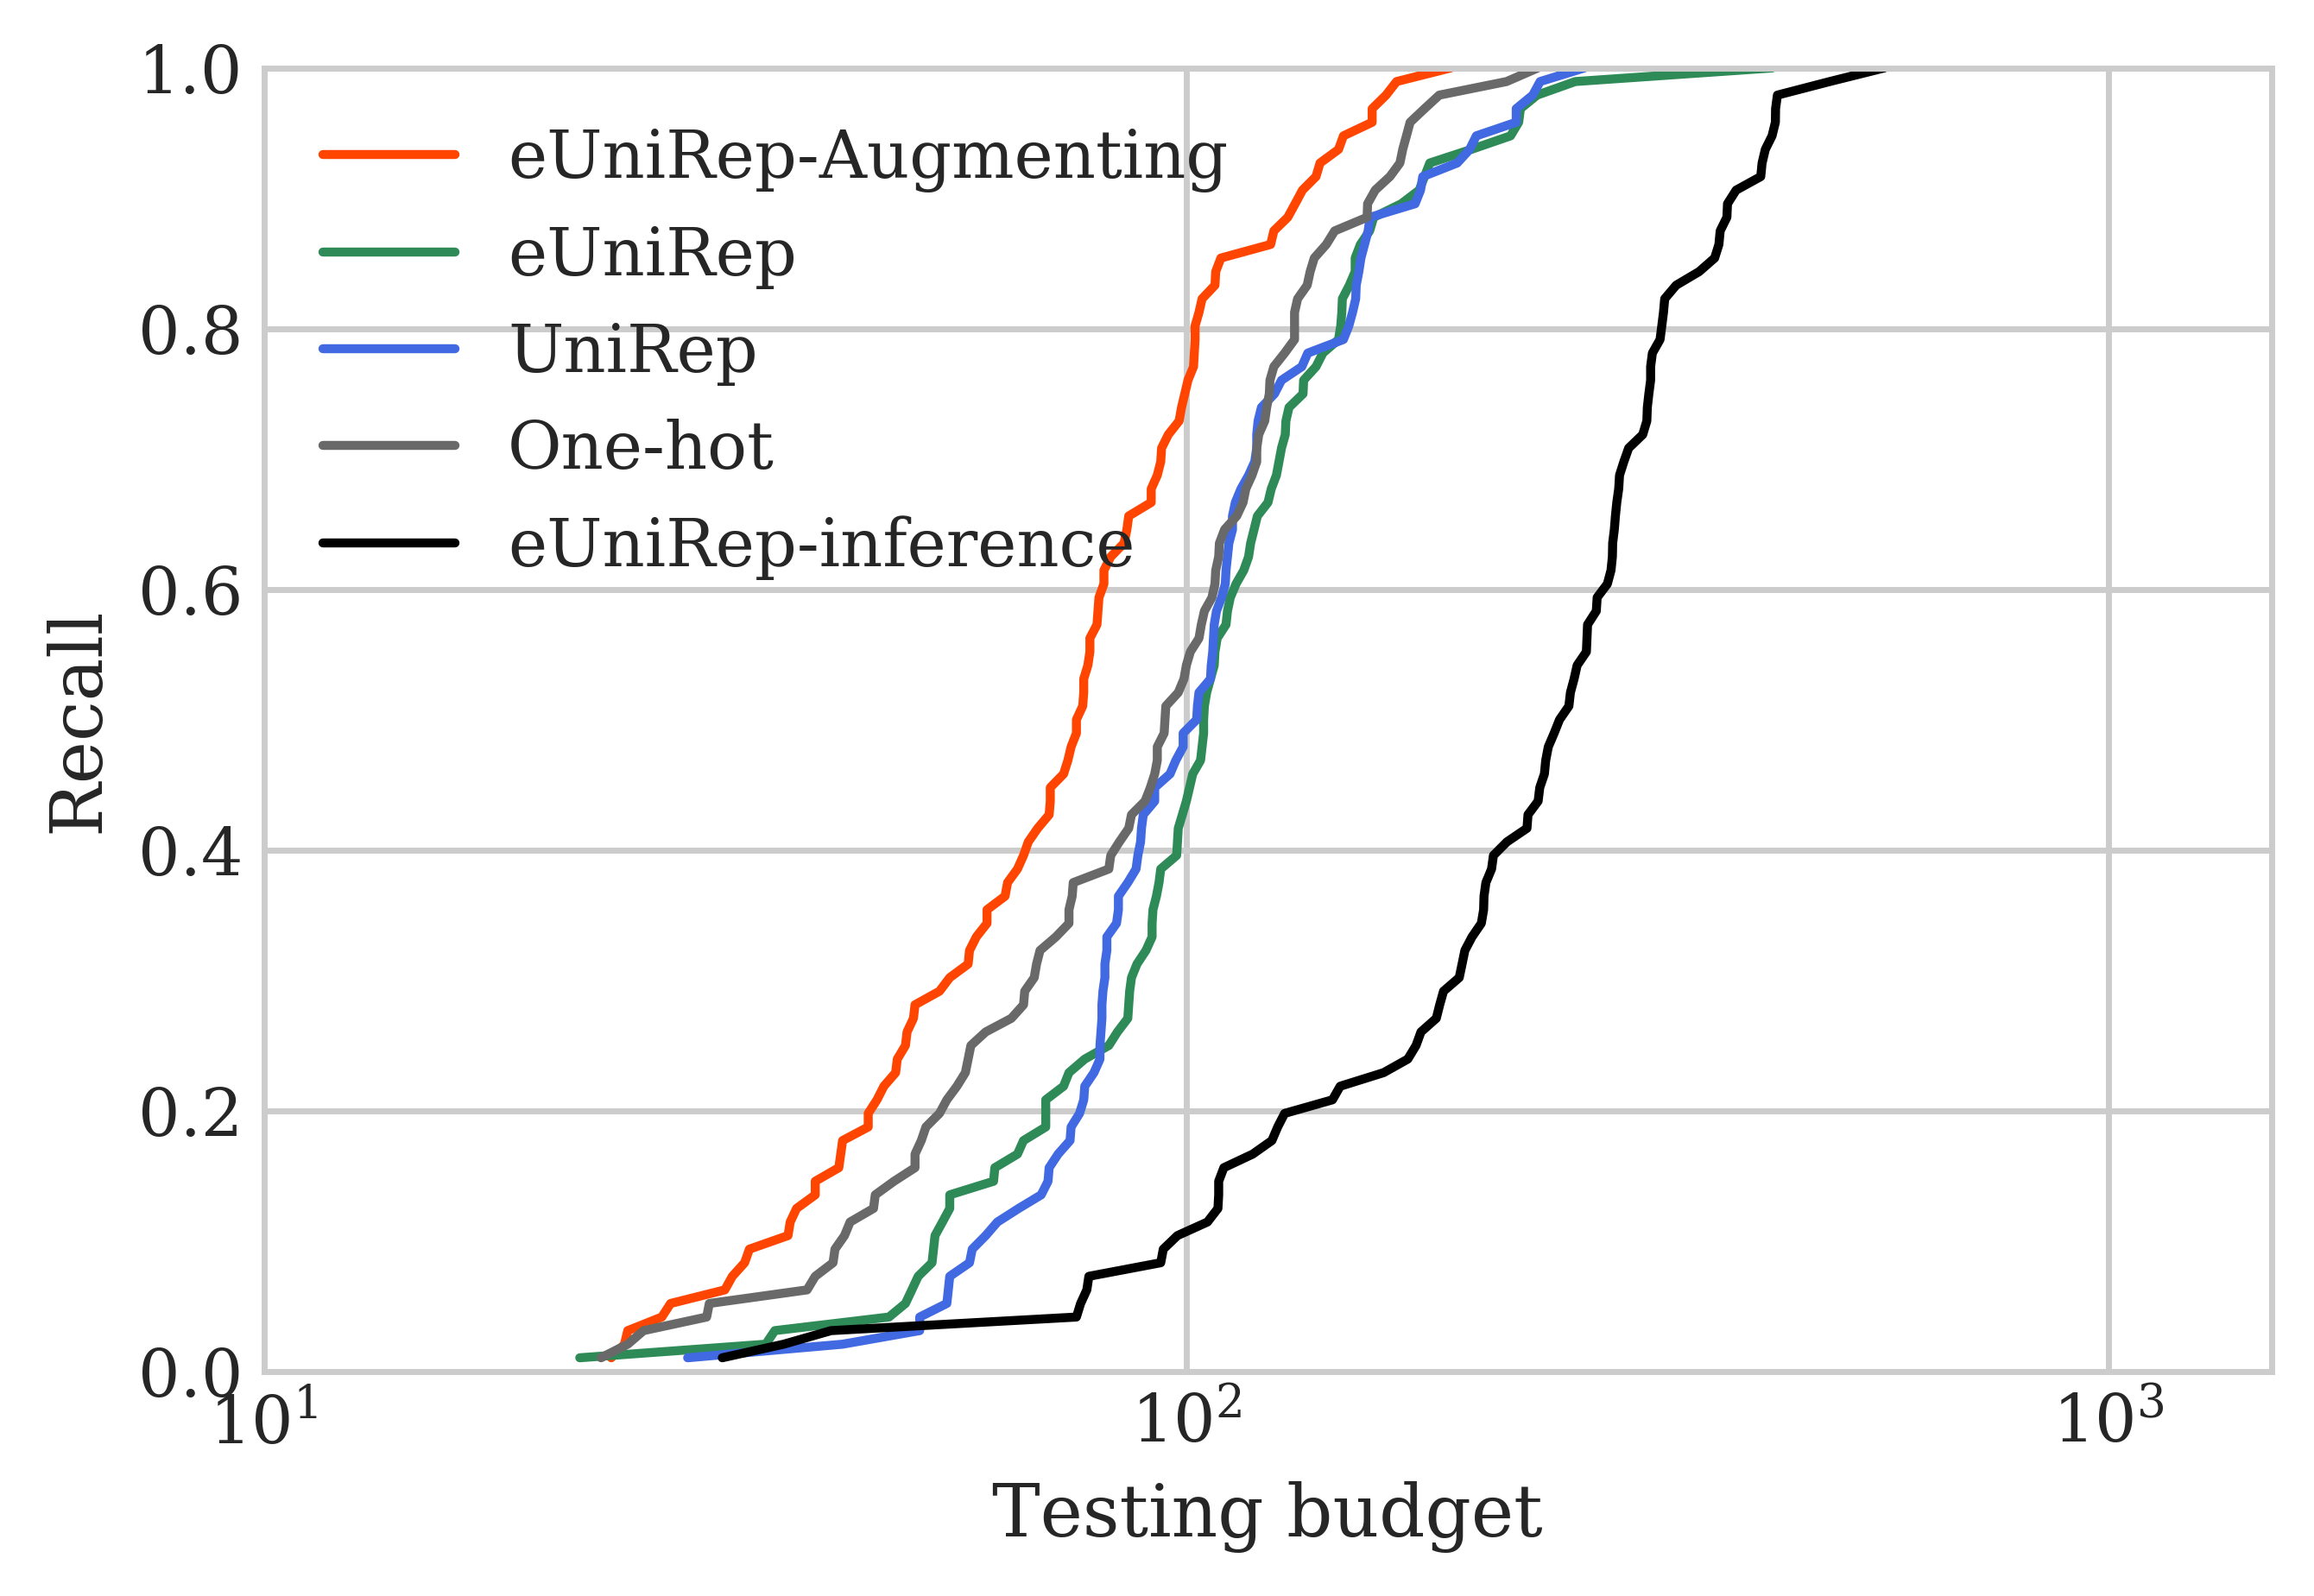

eUniRep-Augmenting: 193.4
eUniRep: 431.6
UniRep 270.0
One-hot 240.4
eUniRep-inference 570.8


In [24]:
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
# sns.set(font_scale=1.0) 

plt.rcParams['savefig.dpi'] = 500
plt.figure(dpi=500)

plt.rcParams['font.family'] = 'DejaVu Serif'
# plt.style.use('seaborn-whitegrid')
# plt.title("Recall(N=1,000)")
#折线图
#点的横坐标
n = 96
random = [i * 13000/n for i in range(1, n+1)]
# x = sorted(spsr[:n])#线1的纵坐标
y = [i/n  for i in range(1, n +1)]#线2的纵坐标
# plt.plot(sorted(multi_seq[:n]),y,color = 'orange',label="Multi-seq")#s-:方形

# plt.plot(sorted(multi[:n]),y,color = 'y',label="Multi")#s-:方形

plt.plot(sorted(set_list[0][:n]),y,color = 'orangered',label="eUniRep-Augmenting")#s-:方形

plt.plot(sorted(set_list[1][:n]),y,color = 'seagreen',label="eUniRep")#s-:方形

plt.plot(sorted(set_list[2][:n]),y,color = 'royalblue',label="UniRep")#s-:方形

plt.plot(sorted(set_list[3][:n ]),y,color = 'dimgrey',label="One-hot")#s-:方形

plt.plot(sorted(set_list[4][:n ]),y,color = 'black',label='eUniRep-inference')#s-:方形black

# plt.plot(sorted(set_list[5][:n ]),y,color = 'darkgrey',label=set_dict["5"].split("_random_")[0])#s-:方形

# plt.plot(sorted(set_list[6][:n ]),y,color = 'gold',label=set_dict["6"].split("_random_")[0])#s-:方形

# plt.plot(sorted(set_list[7][:n ]),y,color = 'c',label=set_dict["7"])#s-:方形

# plt.plot(sorted(set_list[8][:n ]),y,color = 'm',label=set_dict["8"])#s-:方形

# plt.plot(sorted(set_list[5][:n ]),y,color = 'black',label="evotuned_PtsRep_96")#s-:方形
# plt.plot(sorted(random[:n]),y,color = 'black',label="Random")#s-:方形

plt.xlabel(f"Testing budget", fontsize=12)#横坐标名字(low mutation)
plt.ylabel("Recall", fontsize=12)#纵坐标名字
plt.legend(loc = "best",fontsize=12)#图例

plt.xlim((10, 1500))
plt.ylim((0, 1))
plt.xscale('symlog')
plt.legend(loc='upper left')
# plt.savefig(r"C:\Users\joe\Desktop\numpy回归\回归图片_gfp\3more_bright_only_3\whole\\recall_0.1%-v3.pdf")
plt.show()

print('eUniRep-Augmenting:', sorted(set_list[0][:n])[-1])
print('eUniRep:', sorted(set_list[1][:n])[-1])
print('UniRep', sorted(set_list[2][:n])[-1])
# # print('Multi-seq:', multi_seq[0])
# # print('Multi:', multi[0])
print('One-hot', sorted(set_list[3][:n])[-1])
print('eUniRep-inference', sorted(set_list[4][:n])[-1])
# print('PtsRep_rw',set_list[5][0])

IndexError: list index out of range

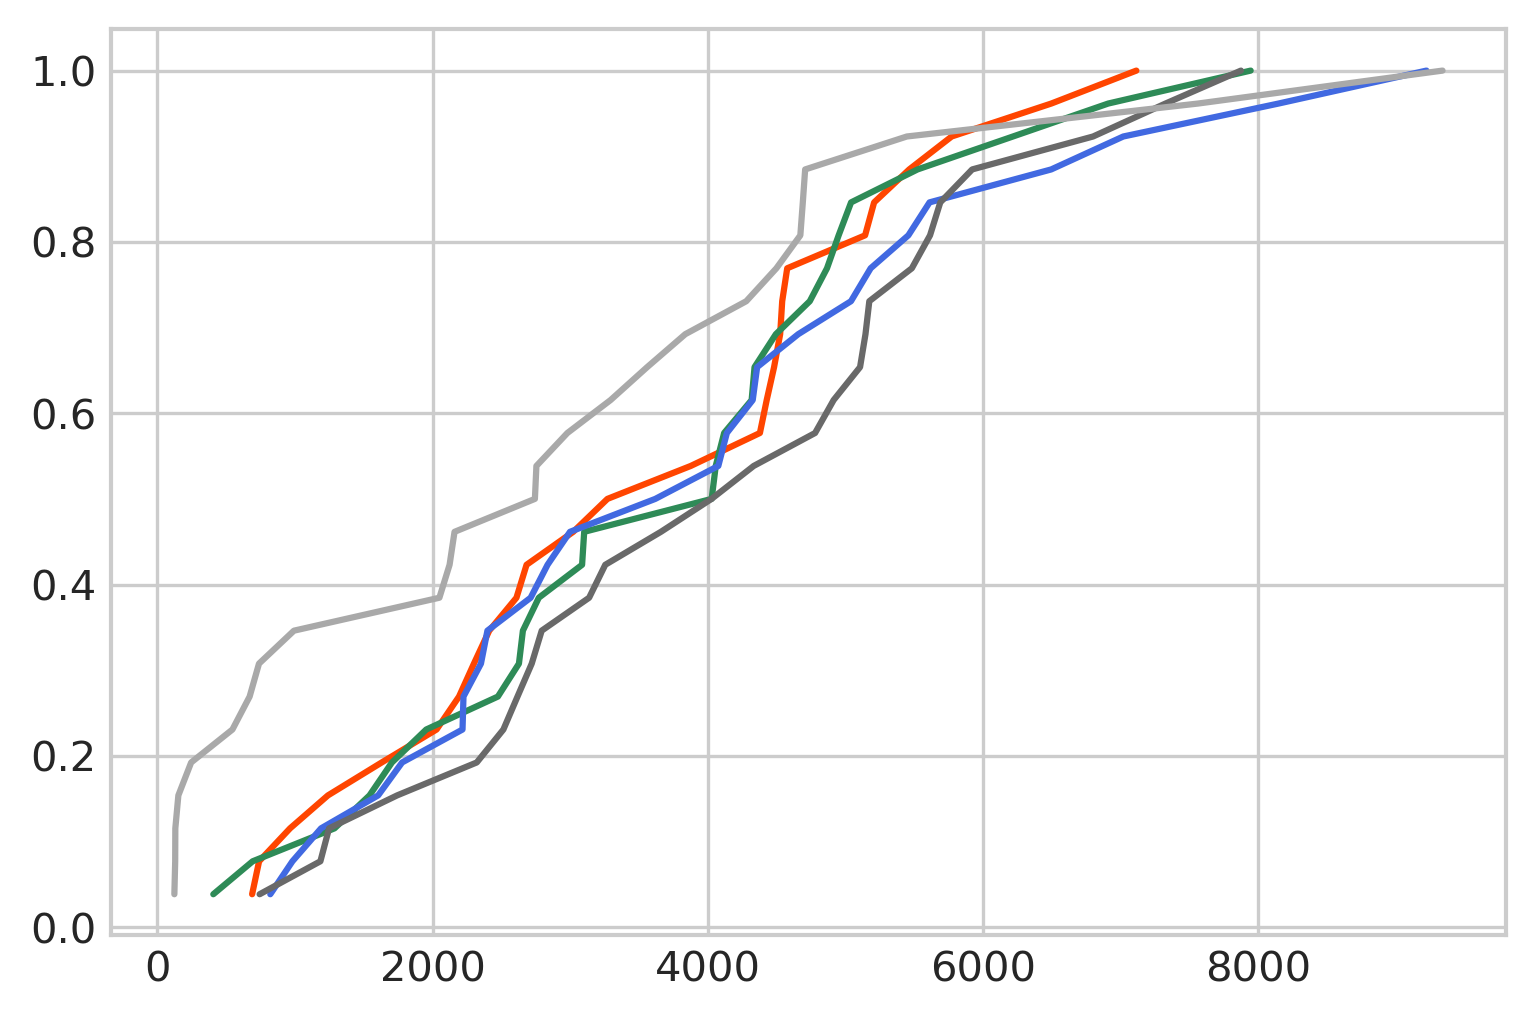

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #
plt.style.use('seaborn-whitegrid')
#折线图
#点的横坐标
n = 26
random = [i * 25697/n for i in range(1, n+1)]
# x = sorted(spsr[:n])#线1的纵坐标
y = [i/n  for i in range(1, n +1)]#线2的纵坐标
# plt.plot(sorted(multi_seq[:n]),y,color = 'orange',label="Multi-seq")#s-:方形

# plt.plot(sorted(multi[:n]),y,color = 'y',label="Multi")#s-:方形

plt.plot(sorted(set_list[0][:n]),y,color = 'orangered',label="PtsRep")#s-:方形

plt.plot(sorted(set_list[1][:n]),y,color = 'seagreen',label="TAPE-BERT")#s-:方形

plt.plot(sorted(set_list[2][:n]),y,color = 'royalblue',label="UniRep")#s-:方形

plt.plot(sorted(set_list[3][:n ]),y,color = 'dimgrey',label="KNR")#s-:方形

plt.plot(sorted(set_list[4][:n ]),y,color = 'darkgrey',label="One-Hot")#s-:方形

plt.plot(sorted(set_list[5][:n]),y,color = 'black',label="SVR")#s-:方形

# plt.plot(sorted(random[:n]),y,color = 'black',label="Random")#s-:方形

plt.xlabel("Testing budget", fontsize=12)#横坐标名字
plt.ylabel("Recall", fontsize=12)#纵坐标名字
plt.legend(loc = "best",fontsize=12)#图例

plt.xlim((10, 26000))
plt.ylim((0, 1))
plt.xscale('symlog')
# plt.savefig(r"C:\Users\joe\Desktop\numpy回归\回归图片_gfp\3more_bright_only_3\whole\\recall_0.1%-v3.pdf")
plt.show()

print('PtsRep:', set_list[0][0])
print('Tape:', set_list[1][0])
print('Unirep', set_list[2][0])
# print('Multi-seq:', multi_seq[0])
# print('Multi:', multi[0])
print('knr', set_list[3][0])
print('onehot', set_list[4][0])
print('SVR', set_list[5][0])

In [15]:
def metrics(dic_real, dic_pred):
    tp = tn = fp = fn = 0
    for key in dic_real:
        if dic_real[key] >= 3 and dic_pred[key] >= 3:
            tp += 1
        elif dic_real[key] >= 3 and dic_pred[key] < 3:
            fn += 1
        elif dic_real[key] <= 3 and dic_pred[key] <= 3:
            tn += 1
        elif dic_real[key] < 3 and dic_pred[key] > 3:
            fp += 1
#     print(tp, tn, fp, fn)
#     正类召回 正类准确 负类召回 负类准确
#     print(tp / (tp+fn), tp/(tp+fp), tn/(tn+fp), tn/(tn+fn))

    #ACC
    return (tp + tn) / (tp + fn + tn + fp)
    

import numpy as np
unirep_triple = []
n = 256
tmp_total = [0.0] * n


dir_name = '汇总14_400_4263_double_1-3mut_rest\\4263'
test_len = 20868

std = []
#5-fold cross validation
for fold in range(0,5):
    numpy = np.load(r'C:\Users\dell\Desktop\PtsRep相关数据及文件\numpy回归\numpy_gfp\%s\UniRep\gfp_triple_'%dir_name + str(fold) + '.npy', allow_pickle=True)
    files = numpy[1]
    value = numpy[0]
    dic_real = {}
    dic_pred = {}
    tmp = []
    for i in range(len(files)):
        dic_pred[files[i]] = value[i]
        dic_real[files[i]] = value[i + test_len]
    real_sort = sorted(dic_real.items(), key=lambda x:x[1], reverse = True)
    pred_sort = sorted(dic_pred.items(), key=lambda x:x[1], reverse = True) 
    acc = metrics(dic_real, dic_pred)
    print('Accuracy '+ str(fold) + ':', acc)
    
    #Recall statistics
    for real in real_sort[:n]:
        real = real[0]
        count = 1
        for v in pred_sort:
            if v[0] == real:
                tmp.append(count)
                break
            count += 1
#     print(tmp)
    std.append(tmp)
    for i in range(n):
        tmp_total[i] += tmp[i] 
# print(std)
# print(np.array(std).T)

# print(tmp_total)
for i in range(len(tmp_total)):
    unirep_triple.append(tmp_total[i]/5)
    
    
    
    
PtsRep_triple = []
n = 256
tmp_total = [0.0] * n
std = []
#5-fold cross validation
for fold in range(0,5):
    numpy = np.load(r'C:\Users\dell\Desktop\PtsRep相关数据及文件\numpy回归\numpy_gfp\%s\PtsRep\gfp_triple_'%dir_name + str(fold) + '.npy', allow_pickle=True)
    files = numpy[1]
    value = numpy[0]
    dic_real = {}
    dic_pred = {}
    tmp = []
    for i in range(len(files)):
        dic_pred[files[i]] = value[i]
        dic_real[files[i]] = value[i + test_len]
    real_sort = sorted(dic_real.items(), key=lambda x:x[1], reverse = True)
    pred_sort = sorted(dic_pred.items(), key=lambda x:x[1], reverse = True) 
    acc = metrics(dic_real, dic_pred)
    print('Accuracy '+ str(fold) + ':', acc)
    
    #Recall statistics
    for real in real_sort[:n]:
        real = real[0]
        count = 1
        for v in pred_sort:
            if v[0] == real:
                tmp.append(count)
                break
            count += 1
    std.append(tmp)
    for i in range(n):
        tmp_total[i] += tmp[i] 
 
for i in range(len(tmp_total)):
    PtsRep_triple.append(tmp_total[i]/5)
    
    
    
    
tape_triple = []
n = 256
tmp_total = [0.0] * n
std = []
#5-fold cross validation
for fold in range(0,5):
    numpy = np.load(r'C:\Users\dell\Desktop\PtsRep相关数据及文件\numpy回归\numpy_gfp\%s\Tape\gfp_triple_'%dir_name + str(fold) + '.npy', allow_pickle=True)
    files = numpy[1]
    value = numpy[0]
    dic_real = {}
    dic_pred = {}
    tmp = []
    for i in range(len(files)):
        dic_pred[files[i]] = value[i]
        dic_real[files[i]] = value[i + test_len]
    real_sort = sorted(dic_real.items(), key=lambda x:x[1], reverse = True)
    pred_sort = sorted(dic_pred.items(), key=lambda x:x[1], reverse = True) 
    acc = metrics(dic_real, dic_pred)
    print('Accuracy '+ str(fold) + ':', acc)
    
    #Recall statistics
    for real in real_sort[:n]:
        real = real[0]
        count = 1
        for v in pred_sort:
            if v[0] == real:
                tmp.append(count)
                break
            count += 1
    std.append(tmp)
    for i in range(n):
        tmp_total[i] += tmp[i] 
 
for i in range(len(tmp_total)):
    tape_triple.append(tmp_total[i]/5)

knr_triple = []
n = 256
tmp_total = [0.0] * n
std = []
#5-fold cross validation
for fold in range(0,5):
    numpy = np.load(r'C:\Users\dell\Desktop\PtsRep相关数据及文件\numpy回归\numpy_gfp\%s\KNR\gfp_triple_'%dir_name + str(fold) + '.npy', allow_pickle=True)
    files = numpy[1]
    value = numpy[0]
    dic_real = {}
    dic_pred = {}
    tmp = []
    for i in range(len(files)):
        dic_pred[files[i]] = value[i]
        dic_real[files[i]] = value[i + test_len]
    real_sort = sorted(dic_real.items(), key=lambda x:x[1], reverse = True)
    pred_sort = sorted(dic_pred.items(), key=lambda x:x[1], reverse = True) 
    acc = metrics(dic_real, dic_pred)
    print('Accuracy '+ str(fold) + ':', acc)
    
    #Recall statistics
    for real in real_sort[:n]:
        real = real[0]
        count = 1
        for v in pred_sort:
            if v[0] == real:
                tmp.append(count)
                break
            count += 1
    std.append(tmp)
    for i in range(n):
        tmp_total[i] += tmp[i] 
 
for i in range(len(tmp_total)):
    knr_triple.append(tmp_total[i]/5)
    
    
    
    
onehot_triple = []
n = 256
tmp_total = [0.0] * n
std = []
#5-fold cross validation
for fold in range(0,5):
    numpy = np.load(r'C:\Users\dell\Desktop\PtsRep相关数据及文件\numpy回归\numpy_gfp\%s\OneHot\gfp_triple_'%dir_name + str(fold) + '.npy', allow_pickle=True)
    files = numpy[1]
    value = numpy[0]
    dic_real = {}
    dic_pred = {}
    tmp = []
    for i in range(len(files)):
        dic_pred[files[i]] = value[i]
        dic_real[files[i]] = value[i + test_len]
    real_sort = sorted(dic_real.items(), key=lambda x:x[1], reverse = True)
    pred_sort = sorted(dic_pred.items(), key=lambda x:x[1], reverse = True) 
    acc = metrics(dic_real, dic_pred)
    print('Accuracy '+ str(fold) + ':', acc)
    
    #Recall statistics
    for real in real_sort[:n]:
        real = real[0]
        count = 1
        for v in pred_sort:
            if v[0] == real:
                tmp.append(count)
                break
            count += 1
    std.append(tmp)
    for i in range(n):
        tmp_total[i] += tmp[i] 
 
for i in range(len(tmp_total)):
    onehot_triple.append(tmp_total[i]/5)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\dell\\Desktop\\PtsRep相关数据及文件\\numpy回归\\numpy_gfp\\汇总14_400_4263_double_1-3mut_rest\\4263\\UniRep\\gfp_triple_0.npy'

In [16]:
n = 10
# recall = 0
recall = int(np.floor(n*0.7))
# recall = int(np.floor(n*1))-1
print(recall)
a = sorted(PtsRep_triple[:n])[recall]
b = sorted(tape_triple[:n])[recall]
c = sorted(unirep_triple[:n])[recall]
# f = sorted(esm_triple[:n])[recall]
d = sorted(knr_triple[:n])[recall]
e = sorted(onehot_triple[:n])[recall]

print(a,b,c,d,e)
print(sorted(tape_triple[:n]))


plt.style.use('seaborn-whitegrid')
num_list = np.fix(np.around ([a, b, c, d, e]))
num_list = list(map(int, num_list))
length = range(len(num_list))
fontsize = 12
error_params=dict(elinewidth=3,ecolor='black',capsize=6,fontsize=fontsize)#设置误差标记参数
plt.bar(length[0], num_list[0], width = 0.6, color = ['orangered'], alpha = 1, label='PtsRep')
plt.bar(length[1], num_list[1], width = 0.6, color = ['seagreen'], alpha = 1, label='TAPE-BERT')
plt.bar(length[2], num_list[2], width = 0.6, color = ['royalblue'], alpha = 1, label='UniRep')
plt.bar(length[3], num_list[3], width = 0.6, color = ['dimgrey'], alpha = 1, label='KNR')
plt.bar(length[4], num_list[4], width = 0.6, color = ['darkgrey'], alpha = 1, label='one-hot')
plt.bar(length[5], num_list[5], width = 0.6, color = ['black'], alpha = 1, label='SVR')

for a,b, c in zip(length,num_list, num_list):
    plt.text(a, b, c, ha='center', va= 'bottom',fontsize=fontsize) 
# plt.yscale('symlog', fontsize=fontsize)
plt.yscale('log')
plt.ylim((1, 100000))
x = range(0, 5, 1)

plt.ylabel("Max brightness observed", fontsize=12)#纵坐标名字
plt.xticks(x, ['PtsRep', 'TAPE-BERT','UniRep', 'KNR','one-hot','SVR'], fontsize=12)
# plt.legend(loc = "upper left", fontsize = 10)
# plt.title("18 of 256")
# plt.savefig(r"C:\Users\joe\Desktop\numpy回归\回归图片_gfp\3more_bright_only_3\whole\\柱状图1-v5.pdf")
plt.show()

7


NameError: name 'PtsRep_triple' is not defined

18
3120.0 2723.8 3338.2 7987.4 6068.0
[27.0, 30.4, 74.6, 110.4, 141.4, 155.2, 179.8, 463.6, 691.0, 906.2, 954.6, 1024.0, 1219.4, 1284.0, 1581.8, 1672.2, 1816.8, 1930.2, 2723.8, 2866.2, 3368.8, 3433.8, 4344.0, 4906.0, 5597.2, 6454.6]


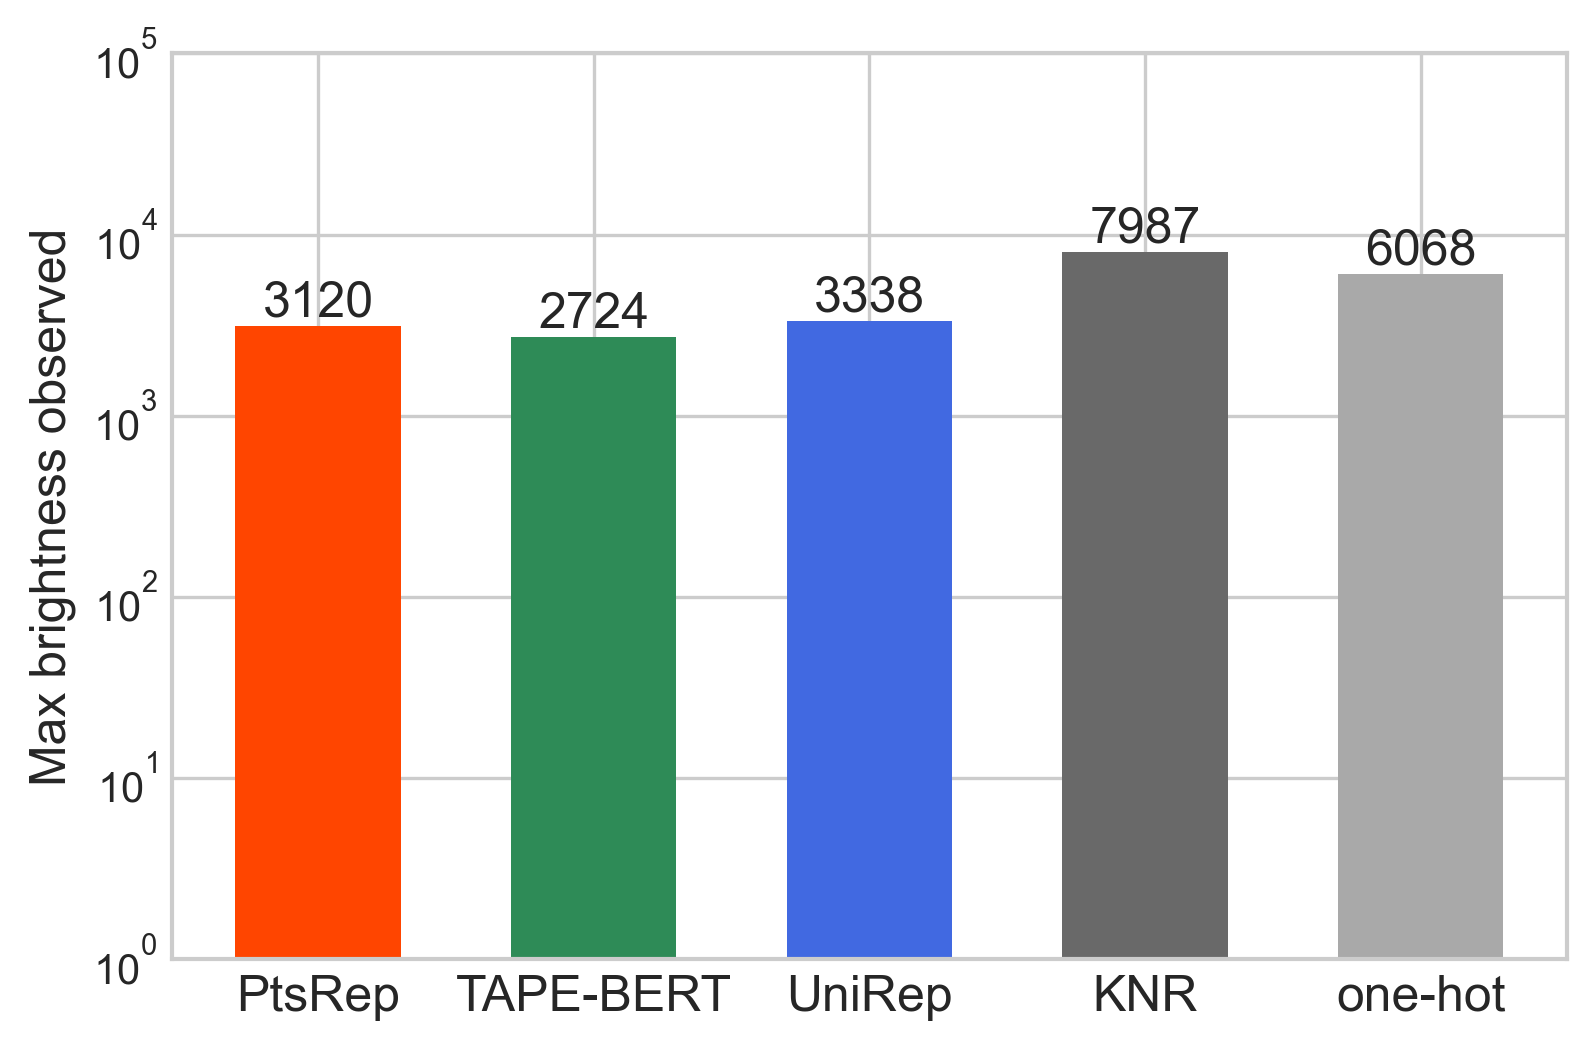

In [213]:
n = 26
# recall = 0
recall = int(np.floor(n*0.7))
# recall = int(np.floor(n*1))-1
print(recall)
a = sorted(PtsRep_triple[:n])[recall]
b = sorted(tape_triple[:n])[recall]
c = sorted(unirep_triple[:n])[recall]
# f = sorted(esm_triple[:n])[recall]
d = sorted(knr_triple[:n])[recall]
e = sorted(onehot_triple[:n])[recall]

print(a,b,c,d,e)
print(sorted(tape_triple[:n]))


plt.style.use('seaborn-whitegrid')
num_list = np.fix(np.around ([a, b, c, d, e]))
num_list = list(map(int, num_list))
length = range(len(num_list))
fontsize = 12
error_params=dict(elinewidth=3,ecolor='black',capsize=6,fontsize=fontsize)#设置误差标记参数
plt.bar(length[0], num_list[0], width = 0.6, color = ['orangered'], alpha = 1, label='PtsRep')
plt.bar(length[1], num_list[1], width = 0.6, color = ['seagreen'], alpha = 1, label='TAPE-BERT')
plt.bar(length[2], num_list[2], width = 0.6, color = ['royalblue'], alpha = 1, label='UniRep')
plt.bar(length[3], num_list[3], width = 0.6, color = ['dimgrey'], alpha = 1, label='KNR')
plt.bar(length[4], num_list[4], width = 0.6, color = ['darkgrey'], alpha = 1, label='one-hot')
plt.bar(length[5], num_list[5], width = 0.6, color = ['darkgrey'], alpha = 1, label='SVR')

for a,b, c in zip(length,num_list, num_list):
    plt.text(a, b, c, ha='center', va= 'bottom',fontsize=fontsize) 
# plt.yscale('symlog', fontsize=fontsize)
plt.yscale('log')
plt.ylim((1, 100000))
x = range(0, 5, 1)

plt.ylabel("Max brightness observed", fontsize=12)#纵坐标名字
plt.xticks(x, ['PtsRep', 'TAPE-BERT','UniRep', 'KNR','one-hot','SVR'], fontsize=12)
# plt.legend(loc = "upper left", fontsize = 10)
# plt.title("18 of 256")
# plt.savefig(r"C:\Users\joe\Desktop\numpy回归\回归图片_gfp\3more_bright_only_3\whole\\柱状图1-v5.pdf")
plt.show()